In [1]:
#Numerical computing packages
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm
from scipy import stats
from numpy.random import choice
np.random.seed(99)

#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
from _plotly_future_ import v4_subplots
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly as pl
import missingno as msno

#ML packages
import sklearn
import sklearn.linear_model as linear_model
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import category_encoders


#jupyter notebook specfic packges
import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML, display
pd.options.display.max_columns = None

In [2]:
%store -r nnn_newdf

In [3]:
df=nnn_newdf.copy()

In [4]:
df.head()

,p_gen,p_yr,p_race,p_born,p_citz,p_marl,p_ilang,p_iprox,p_intrp,f_ilang,f_iprox,f_intrp,mec_lang,mec_prox,mec_intrp,aca_lang,hh_size,fm_size,hh_chld5,hh_chld617,hh_adult,hh_gend,hh_age,hh_born,hh_edu,hh_marl,hh_sedu,hh_inco,f_inc,f_pir
0,male,62.0,nhis_white,born_us,yes_citz,p_married,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,2,2,5.400000e-79,5.400000e-79,1.000000e+00,hh_gend_male,62,hh_born_us,5.0,hh_married,3.0,10.0,10.0,4.39
1,male,53.0,nhis_white,born_not_us,not_citz,p_divorced,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,1,1,5.400000e-79,5.400000e-79,5.400000e-79,hh_gend_male,53,hh_born_not_us,3.0,hh_divorced,5.0,4.0,4.0,1.32
2,male,78.0,nhis_white,born_us,yes_citz,p_married,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,2,2,5.400000e-79,5.400000e-79,2.000000e+00,hh_gend_female,79,hh_born_us,3.0,hh_married,3.0,5.0,5.0,1.51
3,female,56.0,nhis_white,born_us,yes_citz,p_liv_partn,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,1,1,5.400000e-79,5.400000e-79,5.400000e-79,hh_gend_female,56,hh_born_us,5.0,hh_liv_partn,5.0,10.0,10.0,5.00
4,female,42.0,nhis_black,born_us,yes_citz,p_divorced,p_eng_lang_int,p_prox_res_no,p_intrp_no,fam_lan_int_eng,ff_prox_no,fam_intrp_no,mec_lang_eng,mec_prox_no,mec_intrp_no,aca_lan_int_eng,5,5,5.400000e-79,2.000000e+00,5.400000e-79,hh_gend_female,42,hh_born_us,4.0,hh_divorced,5.0,7.0,7.0,1.23


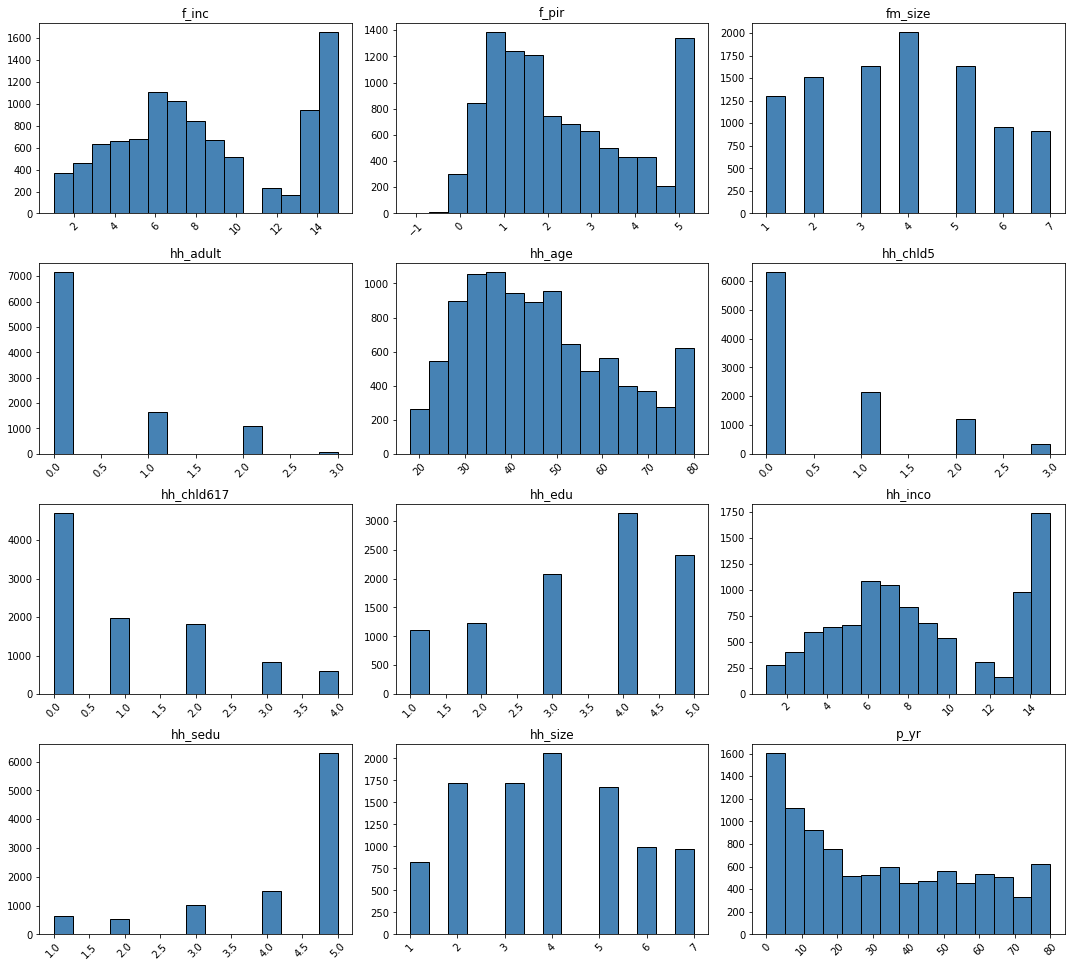

In [5]:
# 1D uni-variate analysis
# histogram 
fig =df.hist(bins=15,color='steelblue',edgecolor='black',linewidth=1.0,xlabelsize=10,ylabelsize=10,
               xrot=45,yrot=0,figsize=(10,9),grid=False)

plt.tight_layout(rect=(0,0,1.5,1.5))

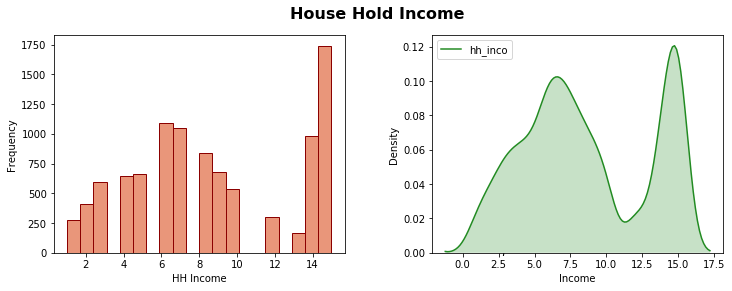

In [6]:
# the mean age of person's are about 34

fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("House Hold Income", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("HH Income")
ax1.set_ylabel("Frequency")

ax1.text(x=24, y=0.14, 
         s=r'$\mu$='+str(round(df['hh_inco'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(df['hh_inco'], 
                               bins=20,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#Bonus: Uncomment the line ax2 = ax1.twinx() to merge the histogram with the density plot. 

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
#ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("Income")
ax2.set_ylabel("Density") 
sns.kdeplot(df['hh_inco'], ax=ax2, shade=True, color='forestgreen')

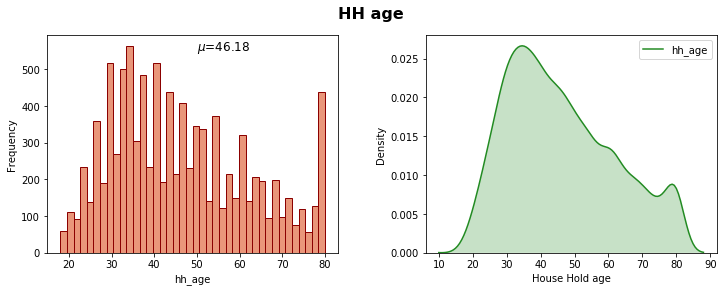

In [7]:
fig = plt.figure( figsize=(12,4) )
title = fig.suptitle("HH age", fontsize=16, fontweight='bold')
fig.subplots_adjust(top=0.88, wspace=0.3)

#===========#
# Histogram #
#===========#
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("hh_age")
ax1.set_ylabel("Frequency")

ax1.text(x=50, y=550, 
         s=r'$\mu$='+str(round(df['hh_age'].mean(),2)), 
         fontsize=12)

freq, bins, patches = ax1.hist(df['hh_age'], 
                               bins=40,
                               color='darksalmon',
                               edgecolor='darkred', linewidth=1)

#Bonus: Uncomment the line ax2 = ax1.twinx() to merge the histogram with the density plot. 

#==============#
# Density Plot #
#==============#
ax2 = fig.add_subplot(1,2,2) 
#ax2 = ax1.twinx() # https://youtu.be/OebyvmZo3w0?t=1m42s
ax2.set_xlabel("House Hold age")
ax2.set_ylabel("Density") 
sns.kdeplot(df['hh_age'], ax=ax2, shade=True, color='forestgreen')

Text(0, 0.5, 'count of families')

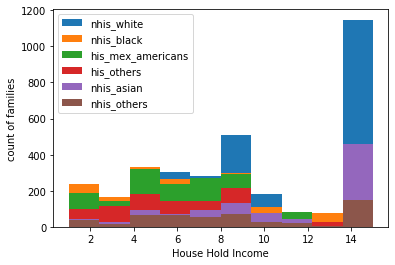

In [8]:
# income vs race
for each in df['p_race'].unique():
    plt.hist(df[df['p_race']==each]['hh_inco'],label=each)
    plt.legend()
plt.xlabel('House Hold Income')
plt.ylabel('count of families')

Text(0.5, 0.98, 'House Hold Attributes Correlation Heatmap')

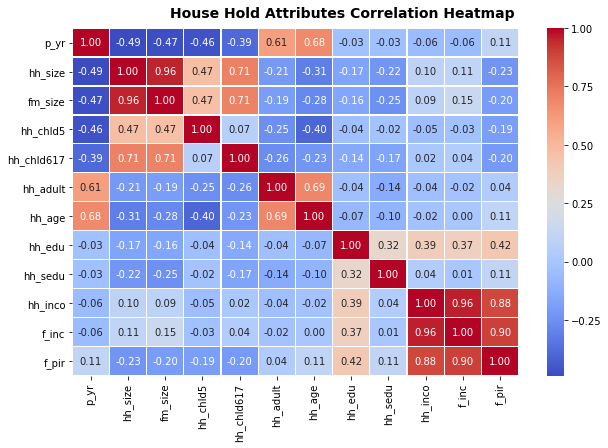

In [9]:
#2D visualizing of data
#bi variate analysis
corr=df.corr()
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('House Hold Attributes Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

# person year and education are correlated with bmi
# year shows about 50% variation in bmi
#education shows about 61% variation in bmi

Text(0.5, 0.98, 'House Hold  Attributes Pairwise Plots')

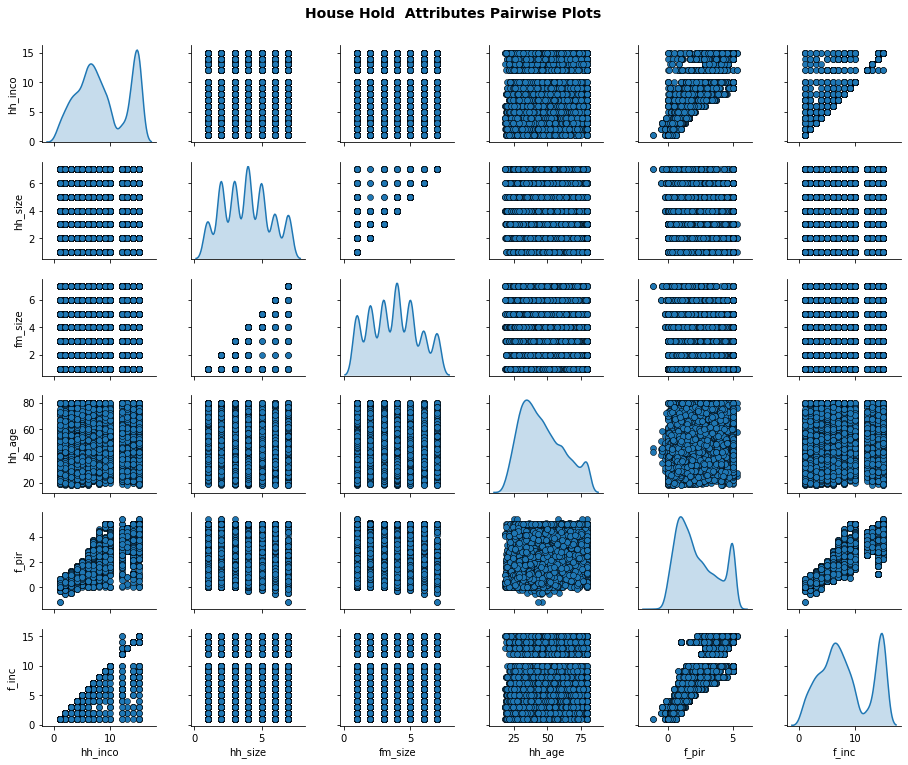

In [10]:
# scatter plots 
#scatter plots

# Attributes of interest
cols = ['hh_inco','hh_size','fm_size','hh_age','f_pir','f_inc']

pp = sns.pairplot(df[cols], 
                  height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('House Hold  Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold')

# also plot lm plots
# so let's color those scatter plots to see who fall in what range

Text(0.5, 0.98, 'House Hold Attributes Pairwise Plots')

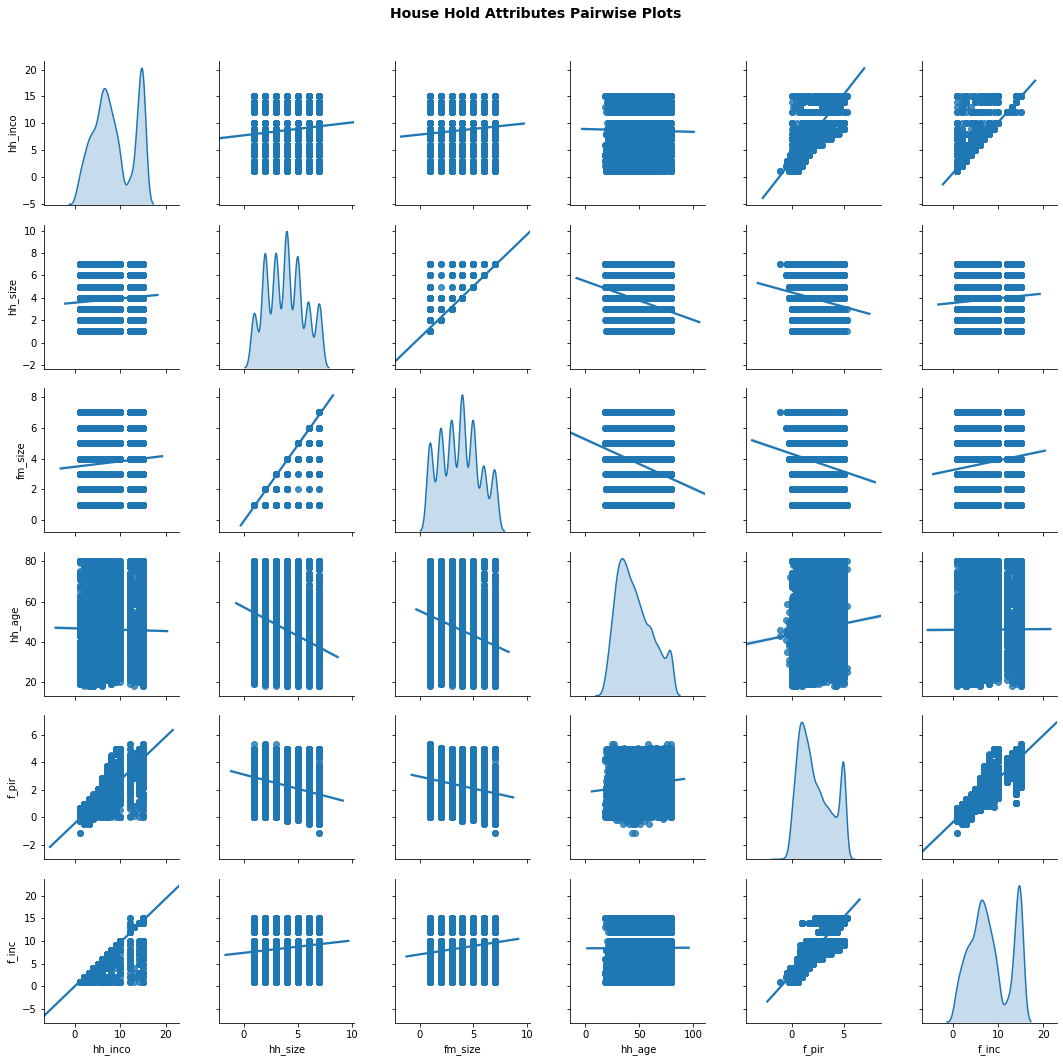

In [11]:
#linear regresion

pp = sns.pairplot(df[cols],diag_kws=dict(shade=True), 
                  diag_kind="kde", # use "kde" for diagonal plots
                  kind="reg" )  

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('House Hold Attributes Pairwise Plots', fontsize=14, fontweight='bold')

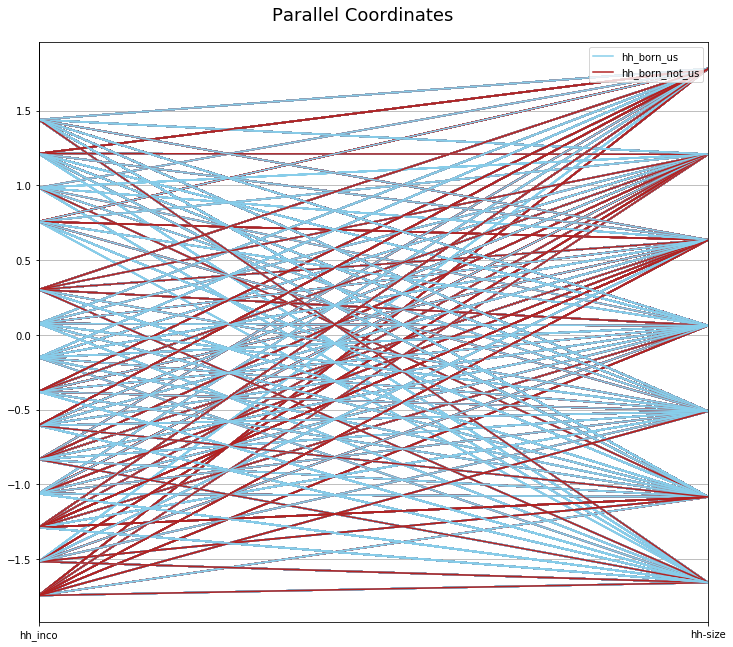

In [18]:
from pandas.plotting import parallel_coordinates

subset_df = df[['hh_inco','hh_size']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=['hh_inco','hh_size'])
tempdf = pd.concat([scaled_df, df['hh_born']], axis=1)
tempdf.head()

from pandas.plotting import parallel_coordinates


fig = plt.figure(figsize=(12, 10))
title = fig.suptitle("Parallel Coordinates", fontsize=18)
fig.subplots_adjust(top=0.93, wspace=0)

pc = parallel_coordinates(tempdf, 
                          'hh_born', 
                          color=('skyblue', 'firebrick'))

Text(0.5, 1.05, 'Family income vs Poverty')

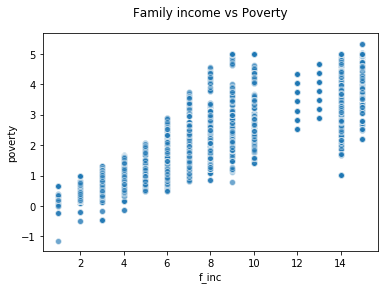

In [19]:
#2 D scatter plot and variants
plt.scatter(df['f_inc'], 
            df['f_pir'],
            alpha=0.4, edgecolors='w')

plt.xlabel('f_inc')
plt.ylabel('poverty')
plt.title('Family income vs Poverty', y=1.05)

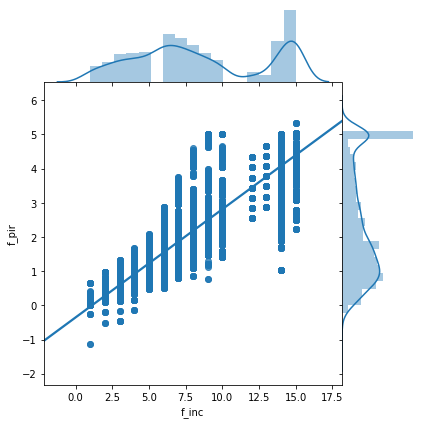

In [20]:
#joint plot with KDE

jp = sns.jointplot(data=df,
                   x='f_inc', 
                   y='f_pir', 
                   kind='reg', # < Add regression and kernel density fits
                   space=0, height=6, ratio=4)

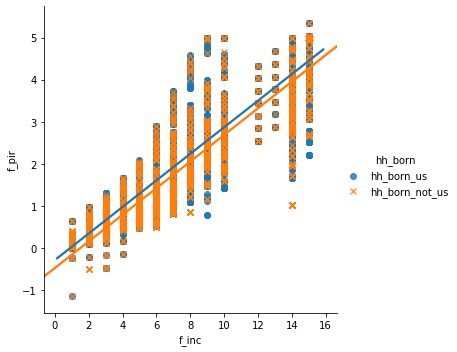

In [21]:
#seaborn color parameters        
# Plot data and regression model fits across a FacetGrid.
lp = sns.lmplot(data=df,
                x='f_inc', 
                y='f_pir', 
                hue='hh_born',markers=["o", "x"])

Text(0.5, 0.98, 'house hold attribute wise')

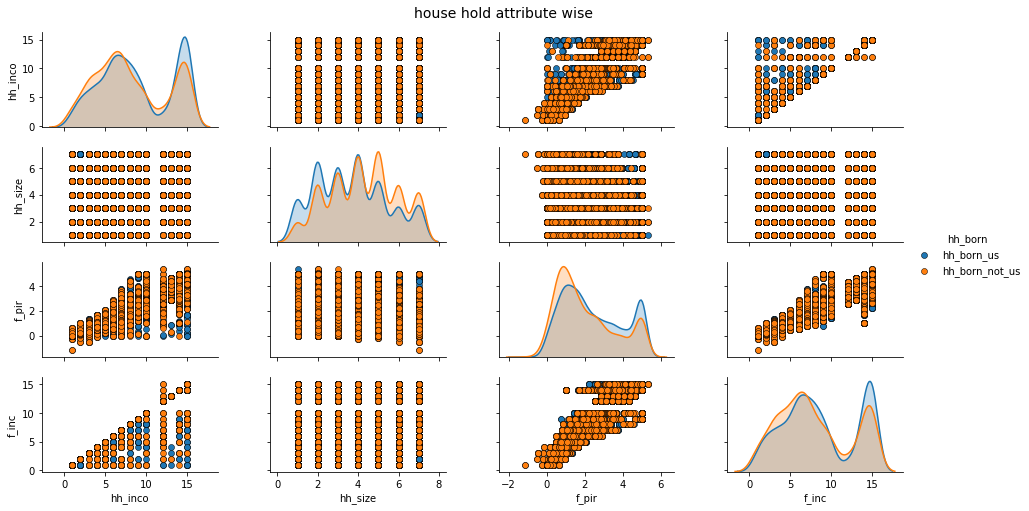

In [22]:
# 3D mixed attributes (Numeric and Categorical)

cols=['hh_inco','hh_size','f_pir','f_inc','hh_born']        
pp = sns.pairplot(data=df[cols], 
                  hue='hh_born', 
                  height=1.8, aspect=1.8, 
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('house hold attribute wise', fontsize=14)

Text(0.5, 0, 'poverty')

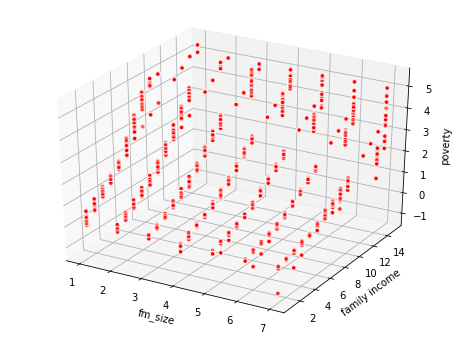

In [23]:
## 3dimensional Plots
fig = plt.figure(figsize=(8, 6))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(111, projection='3d')

ys =df['f_inc']
xs = df['fm_size']
zs =df['f_pir']

ax.scatter(xs,ys,zs,alpha=0.6,edgecolors ='w',c='r', marker='o')
ax.set_ylabel('family income')
ax.set_xlabel('fm_size')
ax.set_zlabel('poverty')

Text(0.5, 1.0, 'family size vs family income vs poverty')

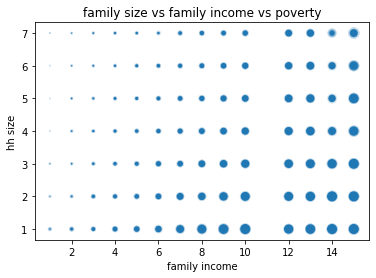

In [24]:
# using seaborn size parameter 

plt.scatter(x=df['f_inc'],
           y= df ['fm_size'],
           s=df['f_pir']*25,
           alpha =0.4,
           edgecolors ='w')

plt.xlabel('family income')
plt.ylabel('hh size')
plt.title('family size vs family income vs poverty')

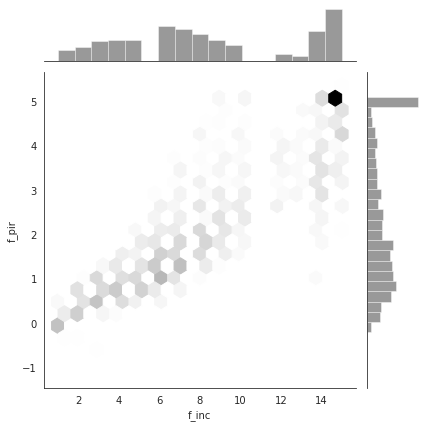

In [25]:

with sns.axes_style("white"):
    sns.jointplot(x=df['f_inc'], y=df['f_pir'], kind="hex", color="k");

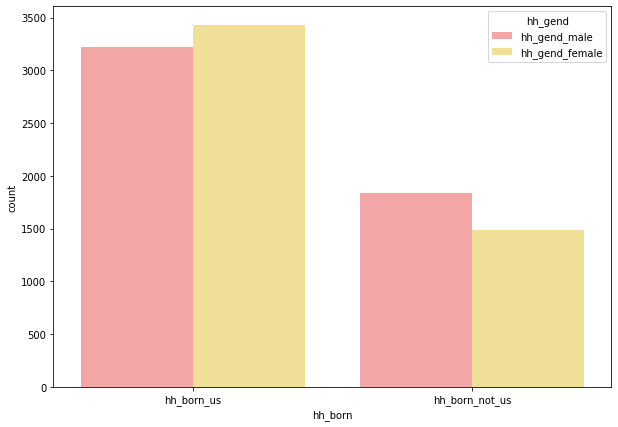

In [26]:
#let's plot some categorical plots
#Using Countplot()

fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="hh_born", 
                   hue="hh_gend", 
                   palette={"hh_gend_male": "#FF9999", "hh_gend_female": "#FFE888"})

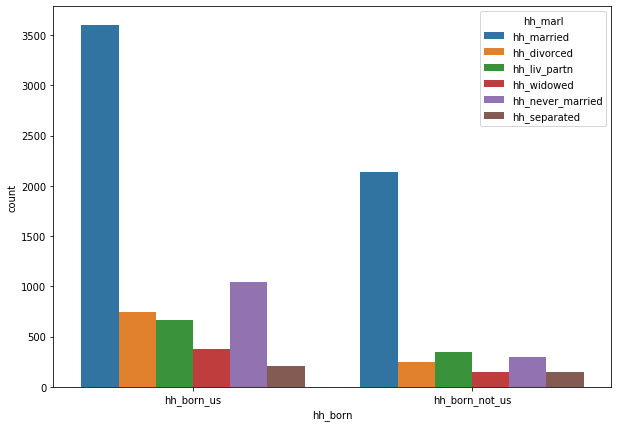

In [27]:
#house Hold born vs Marital

fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="hh_born", 
                   hue="hh_marl", 
                )

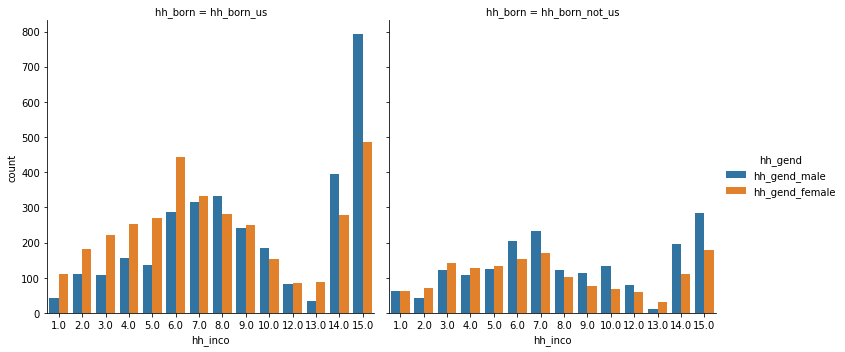

In [28]:
# 3 Discrete Categorical Attributes
#X axis is income
#color is gender
#columns is born in
sns.catplot(x='hh_inco',
              hue ='hh_gend',
              col ='hh_born',
              data =df,
              kind ='count',
              )

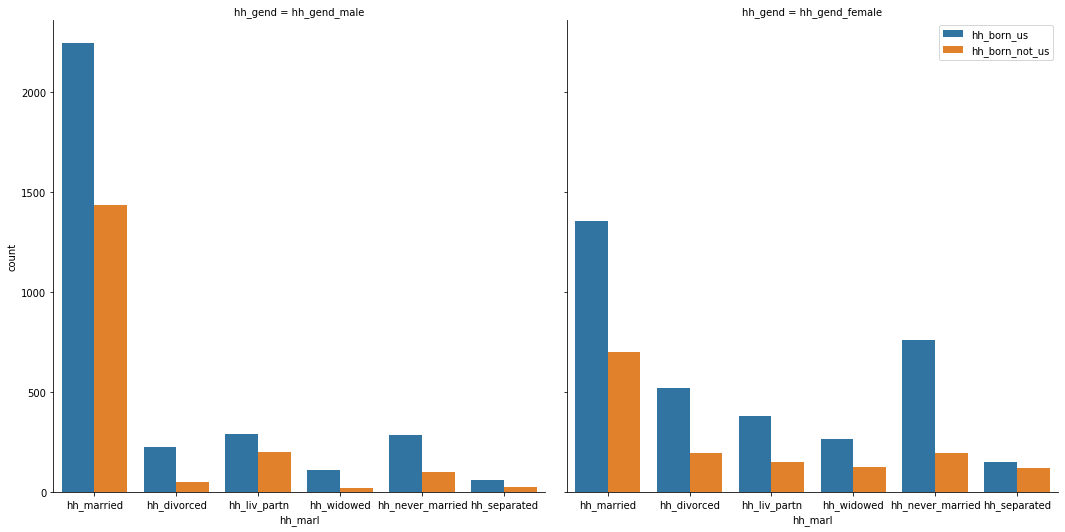

In [29]:
#Marital vs Born vs gender
sns.catplot(x='hh_marl',
              hue ='hh_born',
              col ='hh_gend',
              data =df,
              kind ='count',legend=False
             )
plt.tight_layout(rect=(0,0,1.5,1.5))
plt.legend()

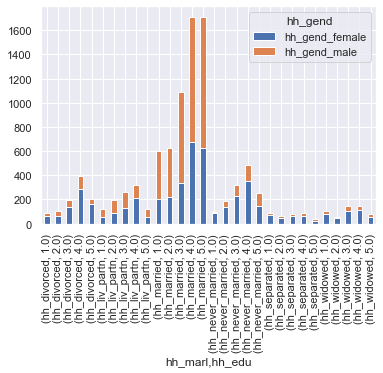

In [30]:
# same above graph in one graph merged together
stackedbar=pd.crosstab([df.hh_marl,df.hh_edu],df.hh_gend)
sns.set()
stackedbar.plot(kind='bar',stacked=True)

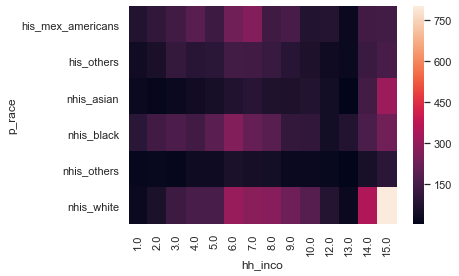

In [31]:
#race vs income
sns.heatmap(pd.crosstab(df['p_race'],df['hh_inco']))

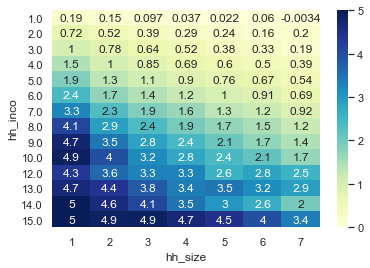

In [32]:
#income vs size
sns.heatmap(pd.crosstab(df.hh_inco,df.hh_size,values=df.f_pir,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

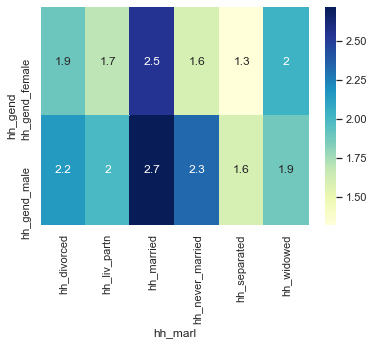

In [33]:
#gender vs marital
sns.heatmap(pd.crosstab(df.hh_gend,df.hh_marl,values=df.f_pir,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

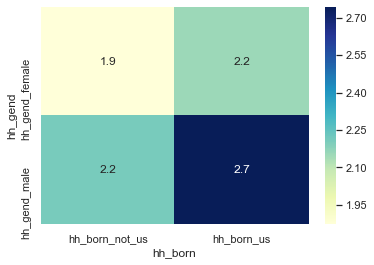

In [34]:
#gender vs born
sns.heatmap(pd.crosstab(df.hh_gend,df.hh_born,values=df.f_pir,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

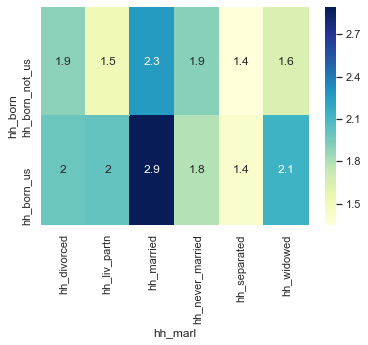

In [35]:
#born vs marital
sns.heatmap(pd.crosstab(df.hh_born,df.hh_marl,values=df.f_pir,aggfunc='mean'),cmap="YlGnBu", annot=True, cbar=True)

Text(0, 0.5, 'f_pir')

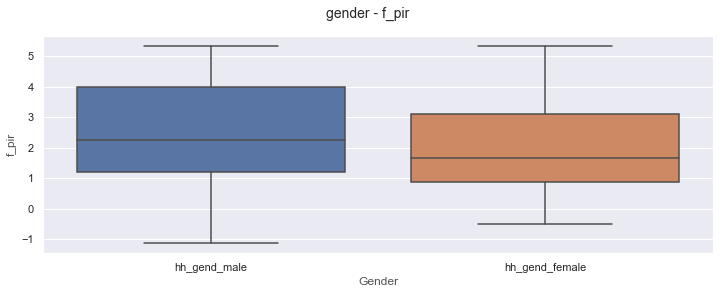

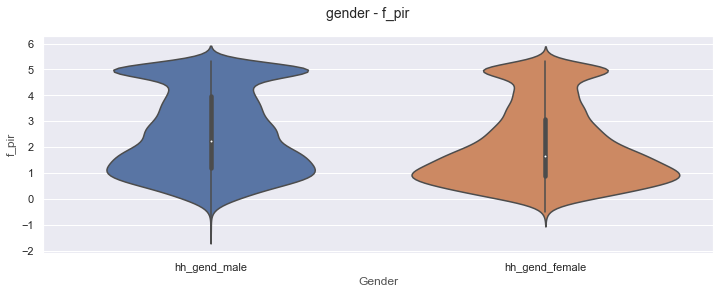

In [37]:
# let's look at distribution using box plots and violin plots
#gender,race,born,marl

# gender
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('gender - f_pir', fontsize=14)

sns.boxplot(data=df,  
            x="hh_gend", 
            y="f_pir", 
            ax=ax)

ax.set_xlabel("Gender",size=12,alpha=0.8)
ax.set_ylabel("f_pir",size=12,alpha=0.8)


f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('gender - f_pir', fontsize=14)

sns.violinplot(data=df,  
            x="hh_gend", 
            y="f_pir", 
            ax=ax)

ax.set_xlabel("Gender",size=12,alpha=0.8)
ax.set_ylabel("f_pir",size=12,alpha=0.8)
# most of them fall in the range
#there are outliers

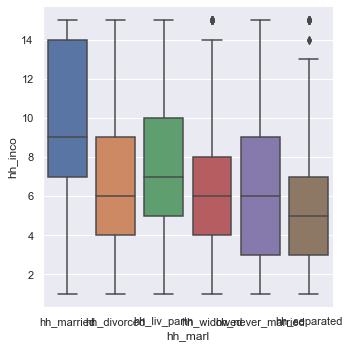

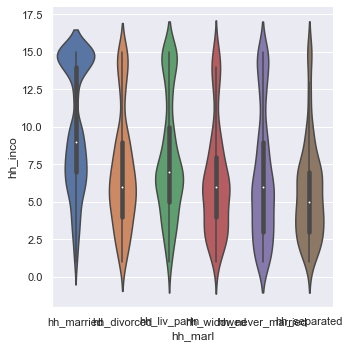

In [38]:

sns.catplot(x="hh_marl", y="hh_inco",kind="box", data=df);
sns.catplot(x="hh_marl", y="hh_inco",kind="violin", data=df);


Text(0, 0.5, 'Poverty')

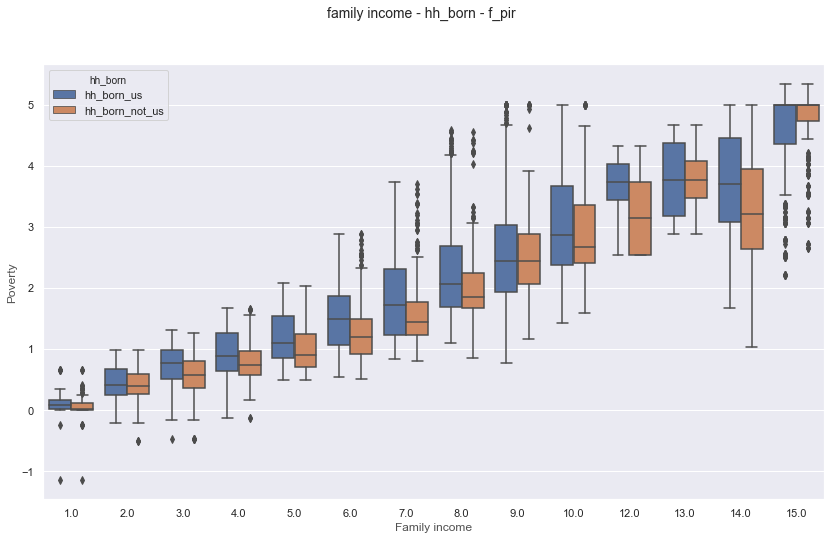

In [39]:
f, ax1 = plt.subplots( figsize=(14, 8))
f.suptitle('family income - hh_born - f_pir', fontsize=14)

#############
# Left Plot #
#############
sns.boxplot(data=df, 
            x="f_inc",
            y="f_pir", 
            hue="hh_born",
            ax=ax1)

ax1.set_xlabel("Family income",size=12,alpha=0.8)
ax1.set_ylabel("Poverty",size=12,alpha=0.8)


Text(0, 0.5, 'Poverty')

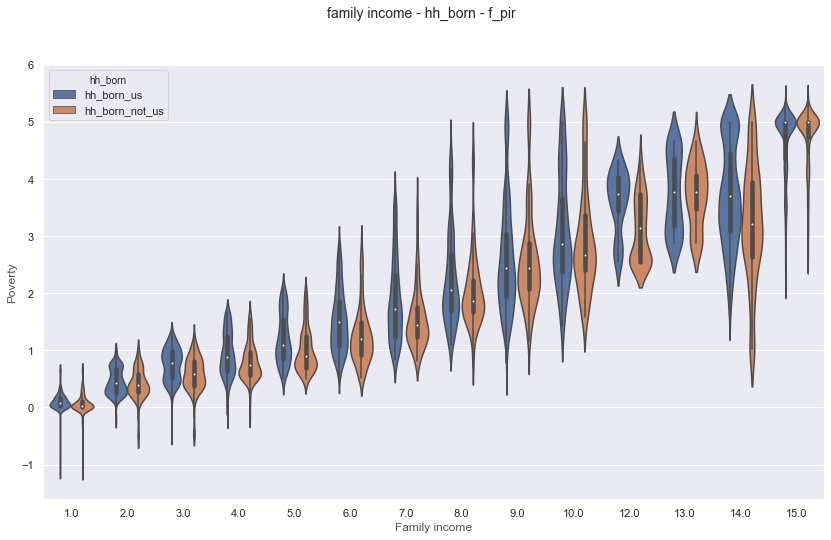

In [40]:
f, ax1 = plt.subplots( figsize=(14, 8))
f.suptitle('family income - hh_born - f_pir', fontsize=14)

#############
# Left Plot #
#############
sns.violinplot(data=df, 
            x="f_inc",
            y="f_pir", 
            hue="hh_born",
            ax=ax1)

ax1.set_xlabel("Family income",size=12,alpha=0.8)
ax1.set_ylabel("Poverty",size=12,alpha=0.8)


In [41]:
df.columns.values

array(['p_gen', 'p_yr', 'p_race', 'p_born', 'p_citz', 'p_marl', 'p_ilang',
       'p_iprox', 'p_intrp', 'f_ilang', 'f_iprox', 'f_intrp', 'mec_lang',
       'mec_prox', 'mec_intrp', 'aca_lang', 'hh_size', 'fm_size',
       'hh_chld5', 'hh_chld617', 'hh_adult', 'hh_gend', 'hh_age',
       'hh_born', 'hh_edu', 'hh_marl', 'hh_sedu', 'hh_inco', 'f_inc',
       'f_pir'], dtype=object)

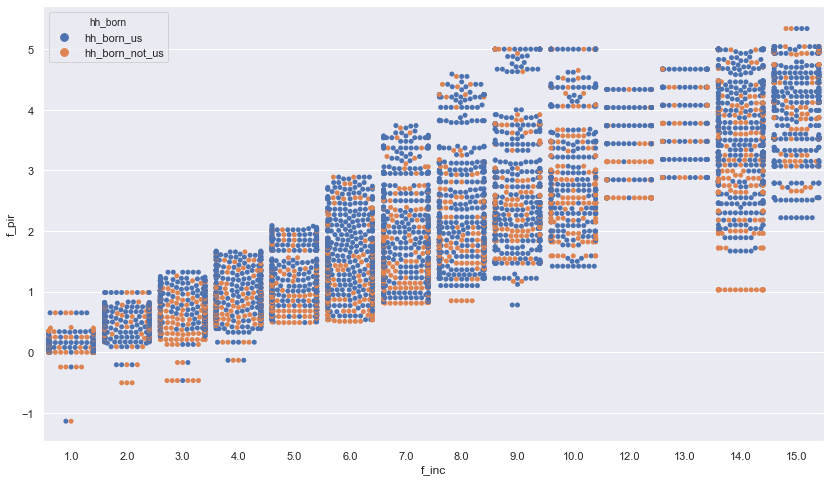

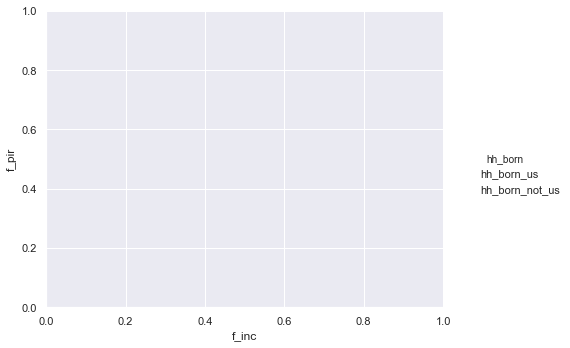

In [42]:
f, ax1 = plt.subplots( figsize=(14, 8))
#4D plots
#it gives a lot of Information at once
#race,gender,bmi,person born 
sns.catplot(x="f_inc", y="f_pir", hue="hh_born",
             height=5,aspect=1.3,
            kind="swarm", data=df,ax=ax1);

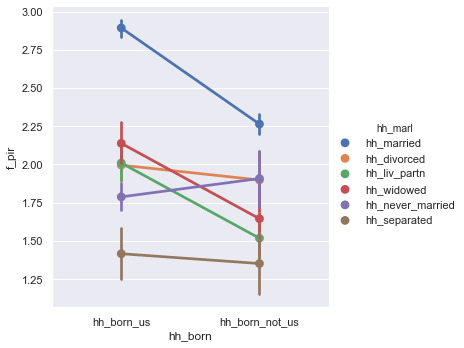

In [43]:
#point plot gives us a lot of information to digest
#hh born vs poverty vs marital
sns.catplot(x="hh_born", y="f_pir", hue="hh_marl", kind="point", data=df);

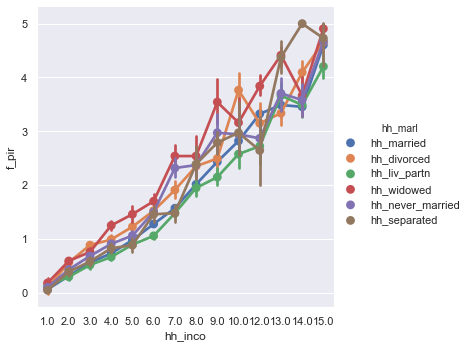

In [50]:
#income vs poverty vs marital
sns.catplot(x="hh_inco", y="f_pir", hue="hh_marl", kind="point", data=df);

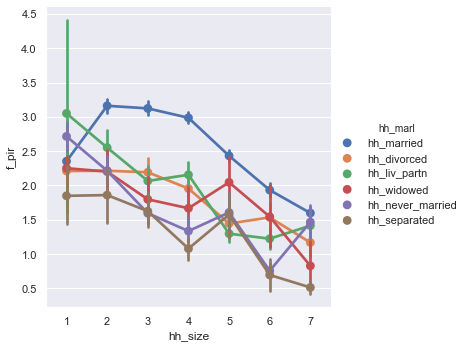

In [51]:
#size vs poverty vs marital
sns.catplot(x="hh_size", y="f_pir", hue="hh_marl", kind="point", data=df);


In [ ]:
# so there exist some co relations and some of the columns are not used.